In [1]:
import math
import numpy as np
from statistics import *
import statsmodels.api as sm
from scipy.stats import chi2
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
def covariance(x, y):
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

def corr(x,y):
    return covariance(x,y)/math.sqrt(variance(x)*variance(y))

## Question1

In [2]:

def g(x):
    if x>1:
        return x**2/math.sqrt(2*math.pi)*(math.exp((-x**2)/2))
    else:
        return 0
    
def f1(x,para = 2):
    if x > 1:
        return 1/para*math.exp(-1/para*(x-1)) 
    else:return 0

def f2(x,df = 10):
    if x > 1:
        return chi2.pdf(x-1, df)
    else:return 0
def gmodf1(x):
    if x > 1:
        return g(x)/f1(x)
    else: return 0
def gmodf2(x,df = 10):
    if x > 1:
        return g(x)/f2(x, df)
    else: return 0     


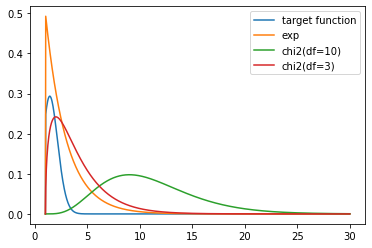

In [4]:
x = np.linspace(1, 30, 1000)
plt.plot(x, [g(i) for i in x])
plt.plot(x, [f1(i) for i in x])
plt.plot(x, [f2(i) for i in x])
plt.plot(x, [f2(i,3) for i in x])
plt.legend(['target function', 'exp', 'chi2(df=10)', 'chi2(df=3)'])
#plt.plot(x, [gmodf1(i) for i in x])
#plt.hist(sample, 200,density = True)
plt.show()


In [5]:

data=[]
for i in range(0,10000):
    x = np.random.exponential(2)+1
    data.append(gmodf1(x))
print("use exp dist as importance function: ","\n\tmean : ", mean(data),"var :",variance(data))
data=[]
for i in range(0,10000):
    x = np.random.chisquare(10)+1
    data.append(gmodf2(x,10))
print("use chi2 dist(df=10) as importance function:","\n\tmean : ", mean(data),"var :",variance(data))
data=[]
for i in range(0,10000):
    x = np.random.chisquare(3)+1
    data.append(gmodf2(x,3))
print("use chi2 dist(df=3) as importance function:","\n\tmean : ", mean(data),"var :",variance(data))

use exp dist as importance function:  
	mean :  0.400981718016553 var : 0.09057730220289174
use chi2 dist(df=10) as importance function: 
	mean :  0.18346834046746235 var : 39.8348438291304
use chi2 dist(df=3) as importance function: 
	mean :  0.3960373104041213 var : 0.33237829086562015


當g(x) 和f(x)越接近時， var(g(x)/f(x))就會越小，在模擬上也就越有效率。 

## Question2

In [6]:
def q2(u):
    return math.exp(-u* math.cos( math.pi * u ))
def control(u,c):
    return q2(u)+c*(u-0.5)

In [7]:
data=[]
for i in range(0,10000):
    x = np.random.uniform(low=0, high=1)
    data.append(q2(x))
print("without control variate:","\n\tmean : ", mean(data),"var :",variance(data))
before = variance(data)
data1=[]
data2=[]
for i in range(0,10000):
    x = np.random.uniform(low=0, high=1)
    data1.append(q2(x))
    data2.append(x)
c= -covariance(data1,data2)/variance(data2)
# print("C = ",c)
data=[]
for i in range(0,10000):
    #x = np.random.uniform(low=0, high=1)
    data.append(control(data2[i],c))
after = variance(data)
print("with control variate:","\n\tmean : ", mean(data),"var :",variance(data))   
print("variance reduction(use uniform(0,1) as control variate): ", (before - after)/before)

without control variate: 
	mean :  1.3277757304297473 var : 0.3341703224430607
with control variate: 
	mean :  1.332125316923973 var : 0.0761735457471373
variance reduction(use uniform(0,1) as control variate):  0.7720517334087424


## Question3

### (a)

In [8]:
def theta(u):
    return math.exp(u**2)
data=[]
for i in range(0,10000):
    x = np.random.uniform(low=0, high=1)
    data.append(theta(x))
print("mean : ", mean(data),"var :",variance(data))

mean :  1.454351145549129 var : 0.2207777870496873


### (b)

In [9]:
def anti(u):
    return 1/2*(math.exp(u**2))+1/2*(math.exp((1-u)**2))
data=[]
for i in range(0,10000):
    x = np.random.uniform(low=0, high=1)
    data.append(anti(x))
print("mean : ", mean(data),"var :",variance(data))

mean :  1.4618431882318486 var : 0.027885480981716778


### (c)

In [10]:
def control(u,c):
    return math.exp(u**2)+c*(u-0.5)

data1=[]
data2=[]
data=[]
for i in range(0,10000):
    x = np.random.uniform(low=0, high=1)
    data1.append(theta(x))
    data2.append(x)
c= -covariance(data1,data2)/variance(data2)
print("C = ",c)
for i in range(0,10000):
    data.append(control(data2[i],c))
print("mean : ", mean(data),"var :",variance(data))

C =  -1.5198435865080282
mean :  1.4621495814866012 var : 0.02855825231696578


### (d)

In [13]:
#unif data
u=[]
for i in range(0,10000):
    x = np.random.uniform(low=0, high=1)
    u.append(x)

In [25]:
# computing a and c
a=0.5
d = {
    'Y': [(1-a)*math.exp((1-i)**2)+a*math.exp(i**2) for i in u],
    'c': [i for i in u]
    }
df = pd.DataFrame(d)
y = df['Y']
x = df[['c']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
#a = model.params[1]
c = -model.params["c"]
print("c :" ,c) #a = 0.5 求 c 

c : 0.0034133346891767127


In [28]:
def comb(u,a,c):
    return a*(math.exp(u**2)) + (1-a)*(math.exp((1-u)**2))+ c*(u-0.5)
data=[comb(i,a,c) for i in u]
print("mean : ", mean(data),"var :",variance(data))

mean :  1.4594576264295331 var : 0.02713136919752307


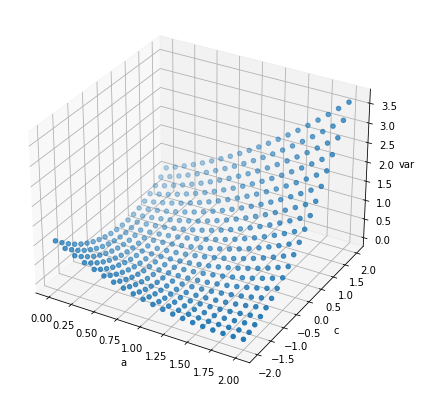

In [23]:
#近似數值解 
point =  pd.DataFrame()
a = np.linspace(0, 2, 20)
c = np.linspace(-2, 2, 20)
xx, yy = np.meshgrid(a, c)
z=[]
for i in a:
    for j in c:
        data=[comb(x,i,j) for x in u]
        token = variance(data)
        z.append(token)
        point = point.append({'a' : i, 'c' : j, 'Var' : token, 'mean':mean(data)}, ignore_index = True)


fig = plt.figure(figsize=(12, 7))
ax1 = plt.axes(projection='3d') # 建立三維座標軸
ax1.scatter(xx, yy, z) # 繪製三維散點圖
ax1.set(xlabel ='a',ylabel ='c',zlabel ='var')
plt.show()

In [24]:
point.loc[point["Var"]<0.0275]

,Var,a,c,mean
72,0.027432,0.315789,0.526316,1.459535
109,0.027197,0.526316,-0.105263,1.459532
146,0.027375,0.736842,-0.736842,1.459529


幾種方法都能有效地降低變異。